#### Author : Swati Rustagi
#### Designation : Data Science & Business Analyst Intern
#### Task by: GRIP @ The Sparks Foundation

#### Task 4 : Exploratory Data Analysis - Terrorism
<b> Level - Intermediate </b>

- Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 
- As a security/defense analyst, try to find out the hot zone of terrorism
- What all security issues and insights you can derive by EDA?
- You can use R, Python, SAS Enterprise Miner or any other tool 
- Data can be found at https://bit.ly/2TK5Xn5

<b> Intermediate Level - Create storyboards. Screen-record along with your audio explaining the charts and interpretations. Use images. </b>

<img src="https://thumbs.dreamstime.com/b/terrorism-burnt-burnt-pieces-paper-word-close-up-44866609.jpg" width="500" height="300">

<b> About Dataset </b>

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

- <b> Geography:</b> Worldwide

- <b> Time period:</b> 1988-2017

- <b> Unit of analysis:</b> Attack
    
- <b> Variables:</b> >100 variables on location, tactics, perpetrators, targets, and outcomes

- <b> Sources:</b> Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

<b> Definition of terrorism: </b>
"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."


<b> Importing Libraries </b>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 150)

print("Libraries loaded sucessfully!!!")

Libraries loaded sucessfully!!!


<b> Reading Data </b>

In [2]:
data = pd.read_csv("globalterrorismdb.csv", encoding='latin1')
data.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


<b> Checking Shape </b>

In [3]:
print("Shape of Dataset is {} rows and {} columns".format(*data.shape))

Shape of Dataset is 181691 rows and 135 columns


<b> Check for Missing Values </b>

In [4]:
# Missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_cols = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_cols = mis_val_table_cols[mis_val_table_cols.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]))   
        print("There are " + str(mis_val_table_cols.shape[0])+" columns that have missing values.")
        return mis_val_table_cols

missing_values_table(data).style.background_gradient(cmap='plasma')

Your selected dataframe has 135
There are 106 columns that have missing values.


,Missing Values,% of Total Values
gsubname3,181671,100.000000
weapsubtype4,181621,100.000000
weapsubtype4_txt,181621,100.000000
weaptype4,181618,100.000000
weaptype4_txt,181618,100.000000
claimmode3,181558,99.900000
claimmode3_txt,181558,99.900000
gsubname2,181531,99.900000
claim3,181373,99.800000
guncertain3,181371,99.800000


<b> Dammm!!! Thats a lot 🥺. Nevermind, we will deal with it 😎. </b> 

<b> Checking for Basic Details </b>

In [5]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [6]:
data.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

<b> We used verbose and null_counts attributes because without this it didnt' return any value due to the higher number of column counts.

Dropping the Columns with 100% missing values</b>

In [7]:
data.drop(['gsubname3', 'weapsubtype4', 'weapsubtype4_txt', 'weaptype4', 'weaptype4_txt'], axis = 1, inplace = True)
print("Shape of Dataset is {} rows and {} columns".format(*data.shape))

Shape of Dataset is 181691 rows and 130 columns


<b> Since, the agenda of this assignment is to perform the Exploratory Data Analysis so, if it is required we will perform missing value imputation and dropping of columns accordingly.

So, let's begin with the Exploratory Data Analysis and we will start with the count of number of successful and unsucessful attacks</b>

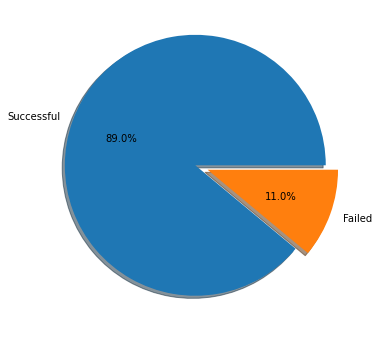

In [8]:
plt.figure(figsize=(6,6))
explode = (0.1,0)
label = ['Successful', 'Failed']
plt.pie(data['success'].value_counts(), labels = label, shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

<b> Only 11% of attacks were failed and rest 89% were sucessful.
    
Lets start with Regions with maximum number of attacks </b> 

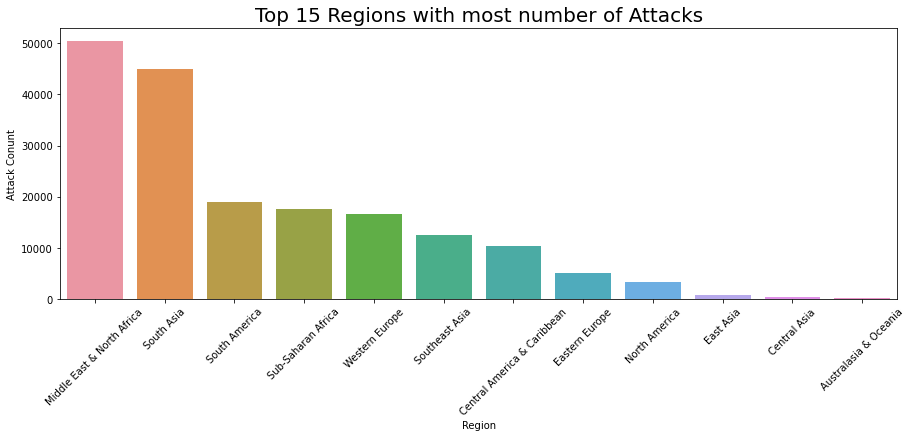

In [9]:
r1 = data['region_txt'].value_counts().reset_index().rename(columns = {'index': 'Region'})
r1.columns.values[1] = 'Count of Attacks'

plt.figure(figsize=(15,5))
sns.barplot(r1['Region'], r1['Count of Attacks'])
plt.xlabel('Region')
plt.ylabel('Attack Conunt')
plt.title("Top 15 Regions with most number of Attacks", fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

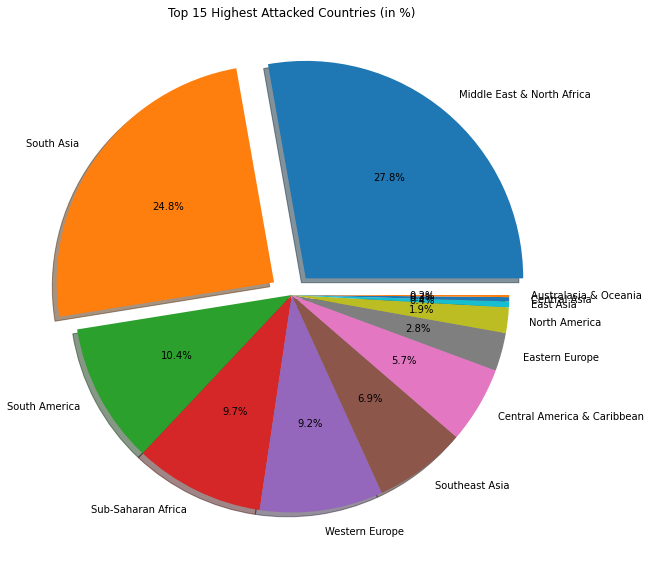

In [10]:
plt.figure(figsize=(20,10))
plt.title('Top 15 Highest Attacked Countries (in %)')
explode = (0.1,0.1,0,0,0,0,0,0,0,0,0,0)
plt.pie(r1['Count of Attacks'], labels=r1['Region'],shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

<b> Regions "Middle East & North Africa" have seen the maximum number of terrorist attacks and "South Asia" is second in the row. And, top two regions have seen the almost 50% of total attacks.

Now, let's check for the Countries.</b>

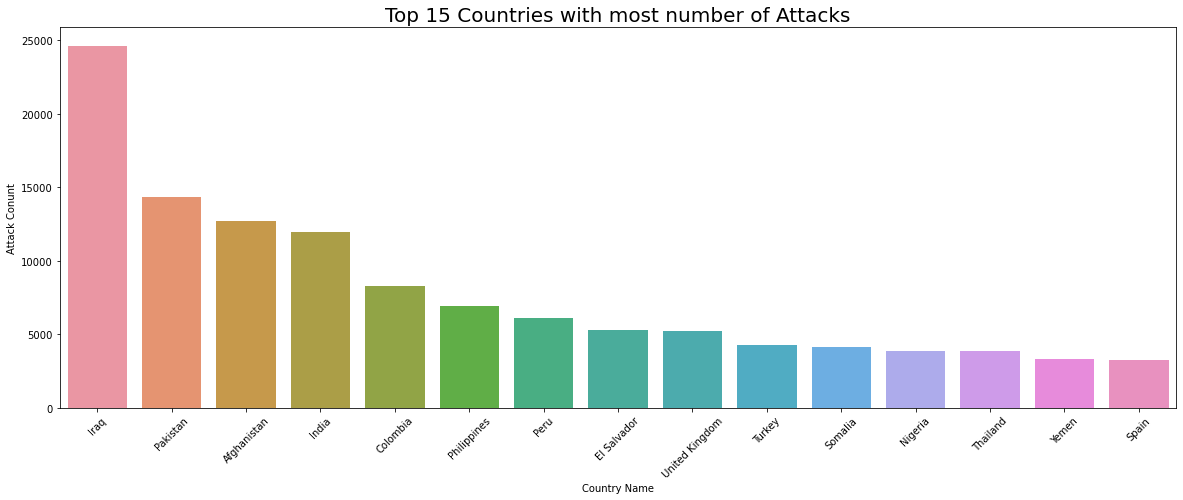

In [11]:
c1 = data['country_txt'].value_counts().reset_index().rename(columns = {'index': 'Country Name'})
c1.columns.values[1] = 'Count of Attacks'

plt.figure(figsize=(20,7))
sns.barplot(c1['Country Name'].head(15), c1['Count of Attacks'].head(15))
plt.xlabel('Country Name')
plt.ylabel('Attack Conunt')
plt.title("Top 15 Countries with most number of Attacks", fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

<b> Country Iraq has seen the highest number of terrorist attack followed by Pakistan, Afganistan and India. Our country India is on 4th rank in the table 😔. 
    
Well, I wish this table wouldn't have existed along with the word called as Terrorism.</b>

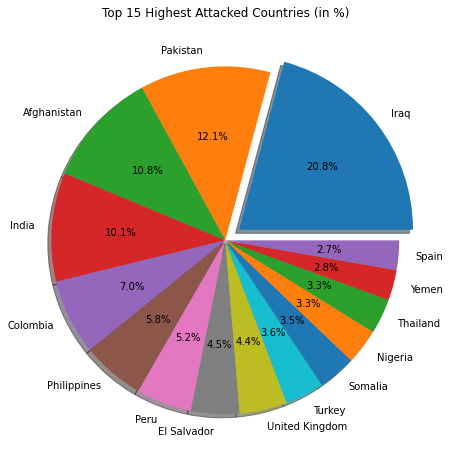

In [12]:
plt.figure(figsize=(20,8))
plt.title('Top 15 Highest Attacked Countries (in %)')
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(c1['Count of Attacks'].head(15), labels=c1['Country Name'].head(15),shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

In [13]:
round((c1['Count of Attacks'].head(9).sum() / c1['Count of Attacks'].sum())*100, 2)

52.59

<b> Iraq stand alone had faced the almost 21% of terrorist attack ever happend in world which is indeed the saddest thing. And Pakistan being second in row had 12% of global attack and difference between first and second rank is 8% which is alot. Our beloved India, it had faced 10% of global terrorist attack. 

And approax 53% of global attacks till 2017 were faced by only 9 countries which is really bad.

Now, lets for the cities target by terrorist.</b>

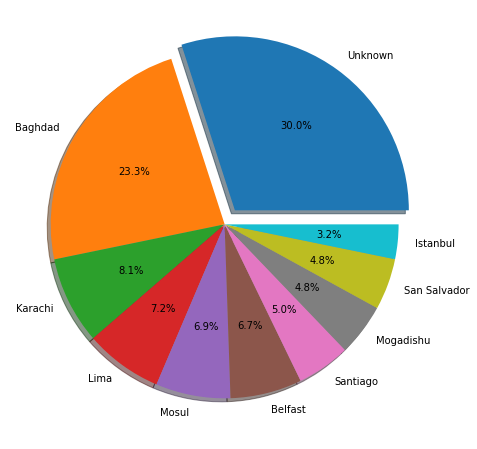

In [14]:
city = data.city.value_counts().reset_index().rename(columns={'index': 'City Name'})
city.columns.values[1] = 'Count of Attacks'

plt.figure(figsize=(8,8))
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(city['Count of Attacks'].head(10), labels=city['City Name'].head(10),shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

<b> As, we can see the top cities with 30% of attacks are unkown and Baghdad with 23.3% is second in rows. If we, logically think, these unknown cities could be anywhere in the world which means, Baghdad is the city with maximum number of attacks, however, with thee nknown locations, it is second in row. 
    
Now, lets check the target of these terrorist attacks. </b>

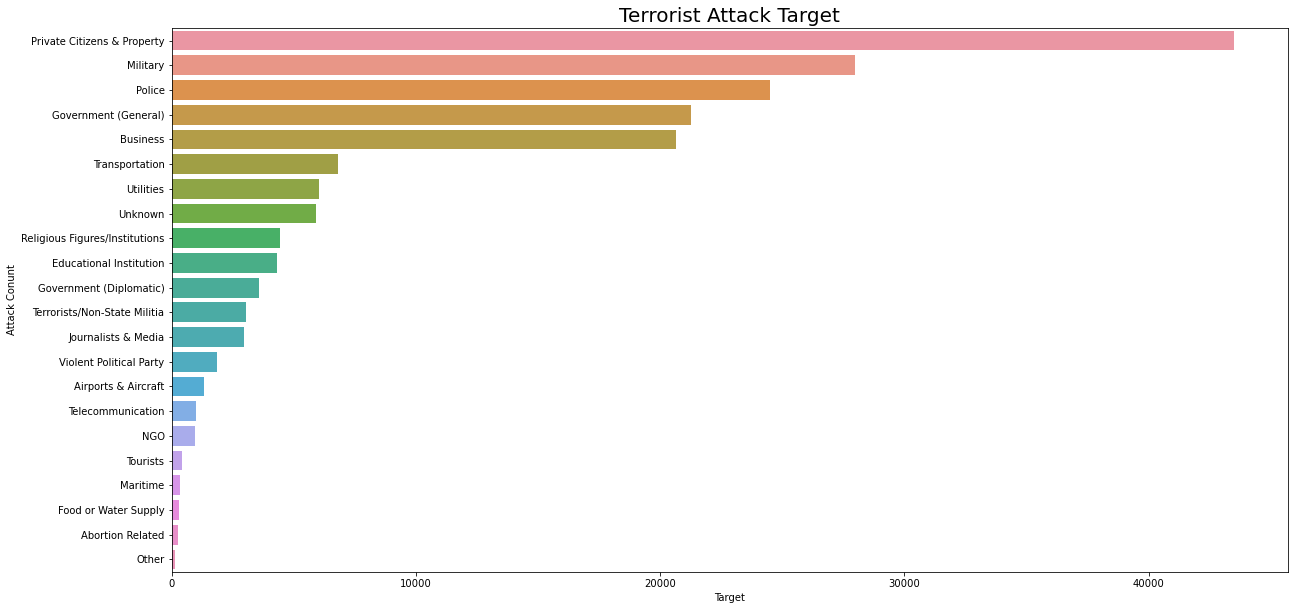

In [15]:
target = data['targtype1_txt'].value_counts().reset_index().rename(columns= {'index': 'Target Type'})
target.columns.values[1] = 'Count'

plt.figure(figsize=(20,10))
sns.barplot(target['Count'], target['Target Type'])
plt.xlabel('Target')
plt.ylabel('Attack Conunt')
plt.title("Terrorist Attack Target", fontsize = 20)
plt.show()

<b> The primary agenda of these terrorist group is to target the VIP civilians and their properties followed by Military Personal, Police and Government.
    
Let's check for the primary nationality they target in a attack </b> 

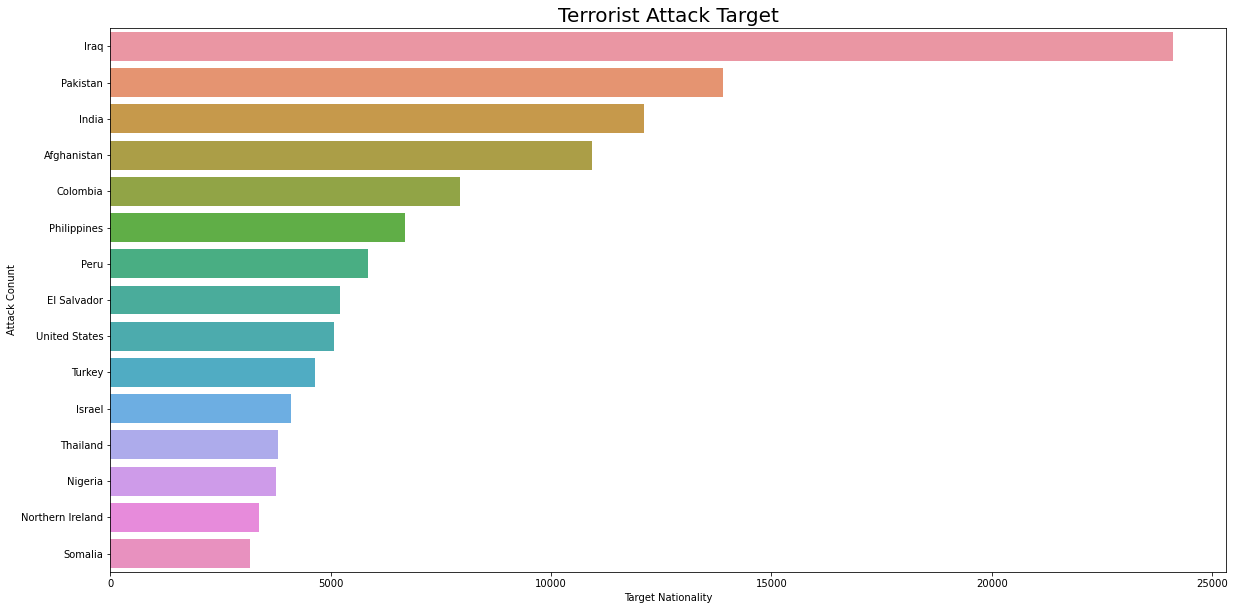

In [16]:
nationality = data['natlty1_txt'].value_counts().reset_index().rename(columns= {'index': 'Nationality'})
nationality.columns.values[1] = 'Count'

plt.figure(figsize=(20,10))
sns.barplot(nationality['Count'].head(15), nationality['Nationality'].head(15))
plt.xlabel('Target Nationality')
plt.ylabel('Attack Conunt')
plt.title("Terrorist Attack Target", fontsize = 20)
plt.show()

<b> The primary attack target is Iraq citizen followed by Pakistan. Howver, Indian is on 4th rank in total attacks, but its citizen falls into the rank of 3rd most attacked nationality. 
    
Now, let's check for the year with highest attack. </b>

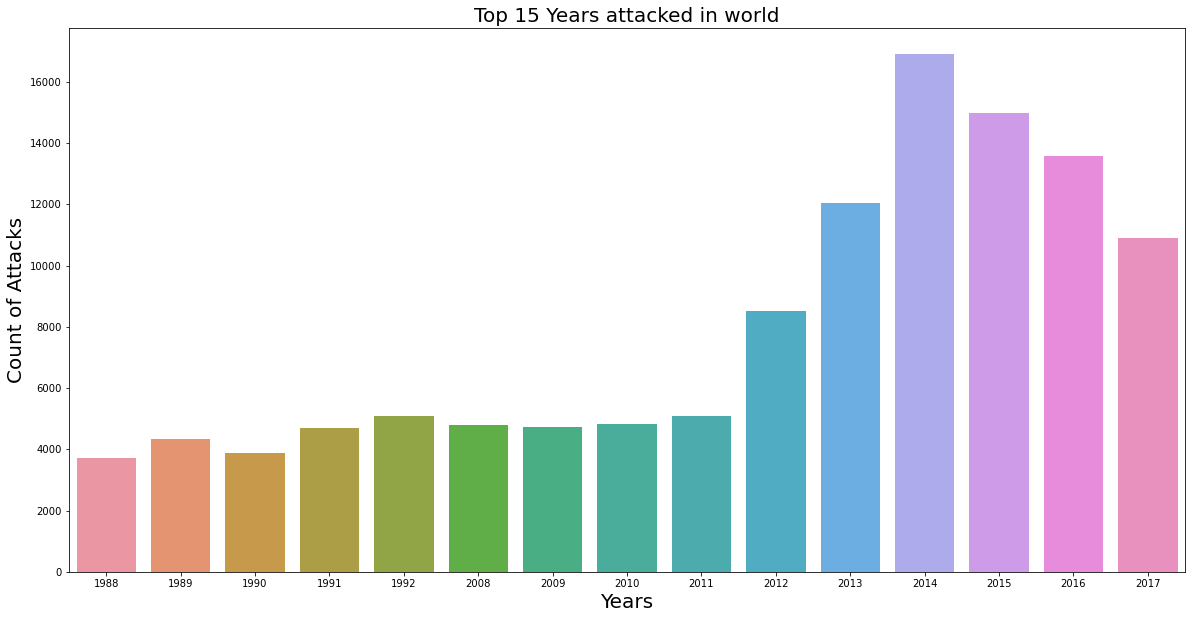

In [17]:
year = data['iyear'].value_counts().reset_index().rename(columns= {'index': 'Year'})
year.columns.values[1] = 'Count of Attacks'

plt.figure(figsize=(20, 10))
sns.barplot(x=year["Year"].head(15), y=year["Count of Attacks"].head(15))
plt.ylabel('Count of Attacks', fontsize = 20)
plt.xlabel('Years', fontsize = 20)
plt.title('Top 15 Years attacked in world', fontsize = 20)
plt.show()

<b> After 2011, terrorist attacks are increased by 60% in 2012 w.r.t. 2011 and 2014 appreantly being the worst year with maximum number of attacks. But, after 2014, the graph is decresing and lets hope this reaches to 0. 

Let's check if they have any favourite month to destroy the global peace.</b>

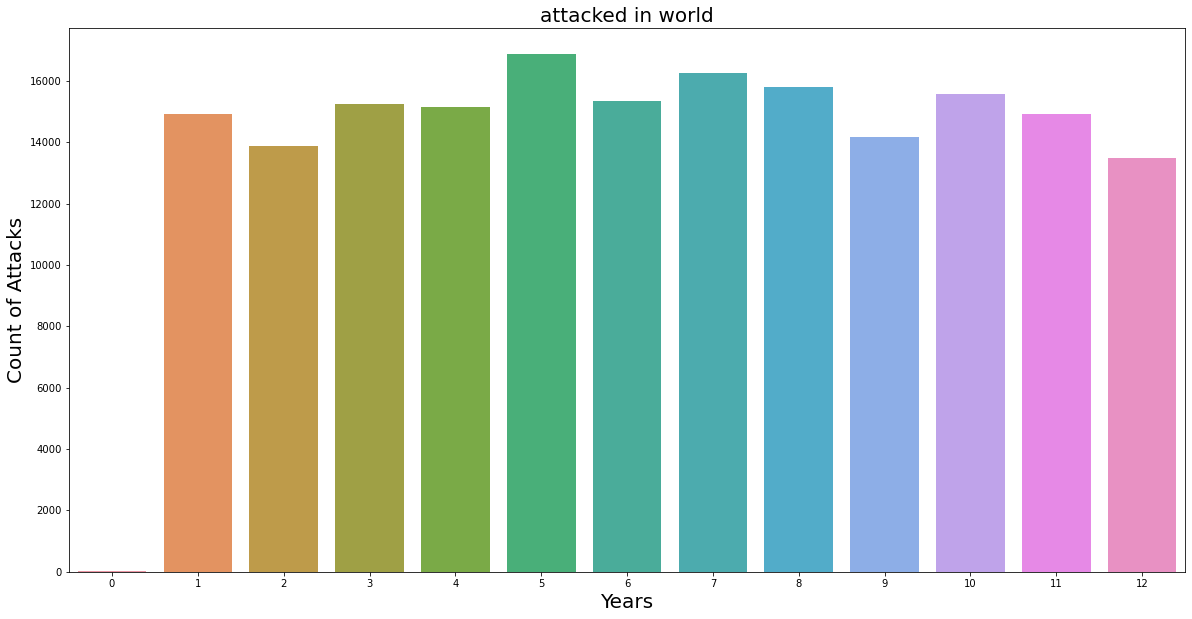

In [18]:
month = data['imonth'].value_counts().reset_index().rename(columns= {'index': 'Month'})
month.columns.values[1] = 'Count of Attacks'
plt.figure(figsize=(20, 10))
sns.barplot(x=month["Month"], y=month["Count of Attacks"])
plt.ylabel('Count of Attacks', fontsize = 20)
plt.xlabel('Years', fontsize = 20)
plt.title("attacked in world", fontsize = 20)
plt.show()

<b> There is no favourite month. They are consistant in terms of destroying the peace. But wait!!!
    
What is this month 0????
    
Now, let's check for the weapons used by terrorist.</b>

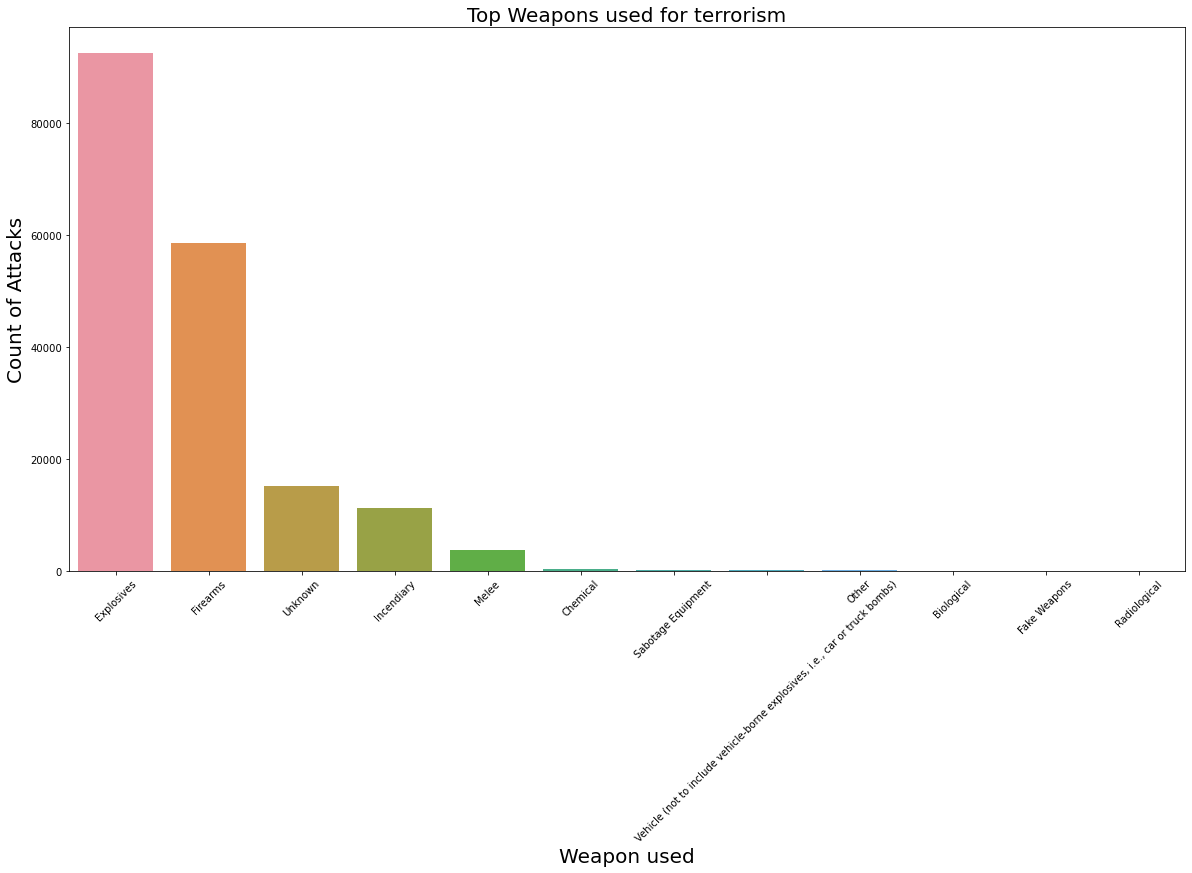

In [19]:
weapons = data['weaptype1_txt'].value_counts().reset_index()
weapons.columns.values[1] = 'Count of Attacks'

plt.figure(figsize=(20, 10))
sns.barplot(weapons["index"], weapons["Count of Attacks"])
plt.ylabel('Count of Attacks', fontsize = 20)
plt.xlabel('Weapon used', fontsize = 20)
plt.title('Top Weapons used for terrorism', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

<b> Explosives is their favourite way of terrorising the world which is 18% higher than the Firearms.

But now, let's check if the explosive was used by a suicide bomber or it was planted. </b>

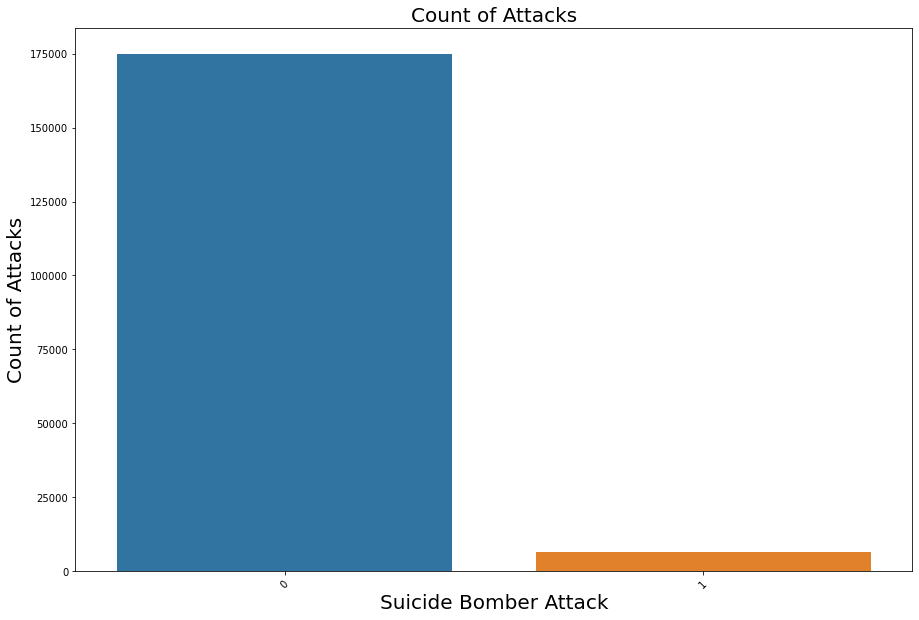

In [20]:
suicide = data['suicide'].value_counts().reset_index()
suicide.columns.values[1] = 'Count of Attacks'

plt.figure(figsize=(15, 10))
sns.barplot(suicide["index"], suicide["Count of Attacks"])
plt.ylabel('Count of Attacks', fontsize = 20)
plt.xlabel('Suicide Bomber Attack', fontsize = 20)
plt.title('Count of Attacks', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

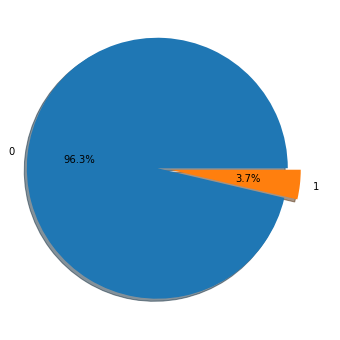

In [21]:
plt.figure(figsize=(6,6))
explode = (0.1,0)
plt.pie(suicide['Count of Attacks'], labels=suicide['index'].head(10),shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

<b> Only 3.7% of attacks were suicide bomber attack and rest were implanted. 
    
 Lets check for the groups responsible for these activities</b>

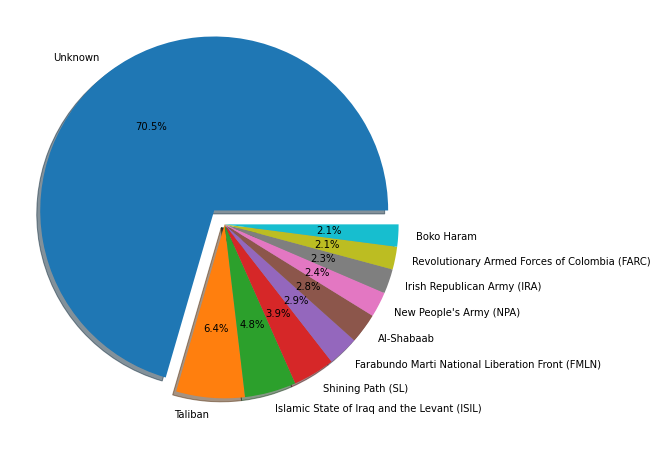

In [22]:
grp = data['gname'].value_counts().reset_index().rename(columns={'index': 'City Name'})
grp.columns.values[1] = 'Count of Attacks'

plt.figure(figsize=(8,8))
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(grp['Count of Attacks'].head(10), labels=grp['City Name'].head(10),shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

<b> Approx 70.5% of attacks responsibility was not taken by any of the active terrorist group and Taliban with 6.4% is second in row followed by ISIL. With this, we see not only major group but local country level terrorist groups are also active and responsible for the attacks.

Now, lets check for the trend in suicide bombing. </b>

<AxesSubplot:xlabel='iyear'>

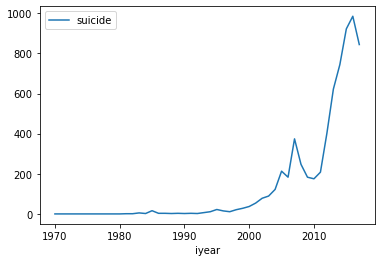

In [23]:
suicides_by_year = data[["iyear","suicide"]].groupby("iyear").aggregate(np.sum)
suicides_by_year.plot()

<b> There was a hike near 2008 or 2009 but then the graph drops but suddenly it increased back in 2011.

That's sad to see how people are ready to die along with killing many more with them. 

We have the data for month and day as well so, we will look at the number of people due because of being a suicide bomber on monthly and daily basis.</b>

<AxesSubplot:xlabel='imonth'>

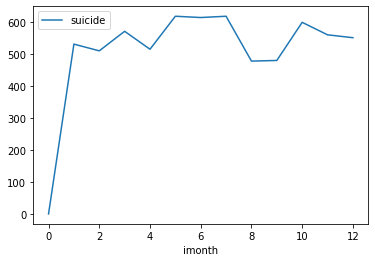

In [24]:
suicides_by_month = data[["imonth","suicide"]].groupby("imonth").aggregate(np.sum)
suicides_by_month.plot()

<AxesSubplot:xlabel='iday'>

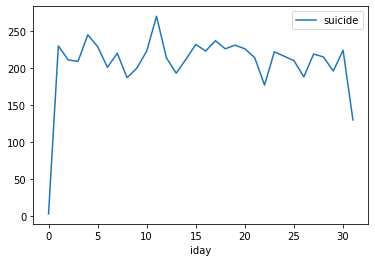

In [25]:
suicides_by_day = data[["iday","suicide"]].groupby("iday").aggregate(np.sum)
suicides_by_day.plot()

<b> There is no consistancy neither in month nor day which means it is unecrtain to tell which day or month they most likely attack with suicide bomber. Which means, if it is planned, we can see a sudden hike in the numbers.

Now, we will check for the terrorist attack and average death per attack </b> 

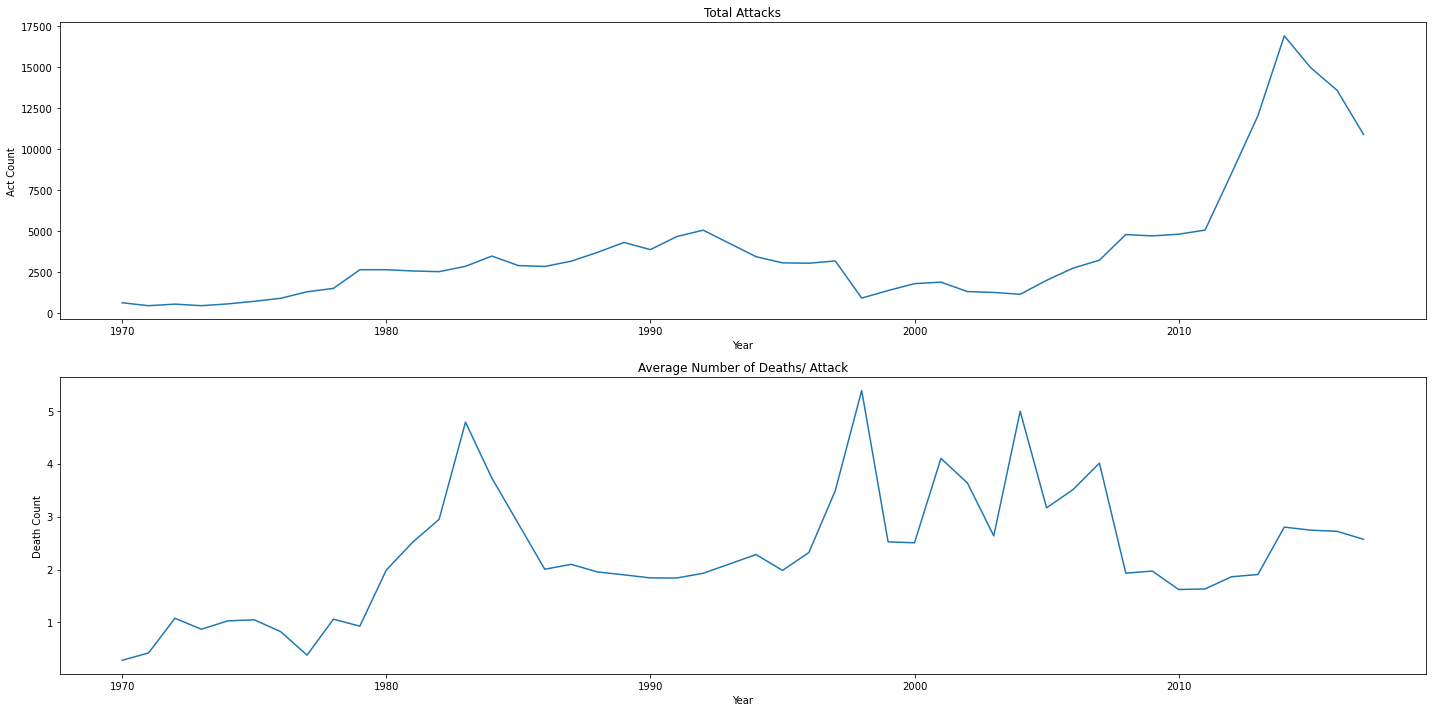

In [26]:
count_year = data.groupby(['iyear']).count()
mean_year = data.groupby(['iyear']).mean()

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set(title = 'Total Attacks', ylabel = 'Act Count', xlabel = 'Year')
ax1.plot(count_year.index, count_year.eventid)
ax2.set(title = 'Average Number of Deaths/ Attack', ylabel = 'Death Count', xlabel = 'Year')
ax2.plot(mean_year.index, mean_year.nkill)
plt.tight_layout()

<b> With increase in terroristic acts, the number of deaths per act is increased. This could possible be due to there being more densely populated areas over time. </b>

<b> Kindly drop a like if you like my work.

Thank you!!! </b>